### Import the necessary libraries:

### To build the Linear Regression Model on our dataset we need to import the following packages:

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

* Carat - Carat weight of the cubic zirconia.
* Cut  - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
* Color -Colour of the cubic zirconia.With D being the worst and J the best.
* Clarity - Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
* Depth	- The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table	- The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
* Price	- the Price of the cubic zirconia.
* X	- Length of the cubic zirconia in mm.
* Y	- Width of the cubic zirconia in mm.
* Z	- Height of the cubic zirconia in mm.

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

#### Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modelling the data. Plotting in EDA consists of Histograms, Box plot, pairplot and many more. It often takes much time to explore the data. Through the process of EDA, we can define the problem statement or definition on our data set which is very important.


### Load the data:

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('cubic_zirconia.csv')

### Checking the data:

In [3]:
# Check top few records to get a feel of the data structure
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

### Checking the shape of the data :

In [5]:
# Checking the shape of the dataset.
print("Number of rows: ",df.shape[0], "\n""Number of columns: ",df.shape[1])

Number of rows:  26967 
Number of columns:  11


### Retreive the list of fields along with their data type:

In [48]:
#Getting the info data types column wise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Observation-1:
- The data set contains 26967 row, 11 columns.
- In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.
- The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
- Except depth, in all the column non null count is 26967.

### Checking the Summary Statistic

In [49]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [50]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [51]:
### Checking for Missing Values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

### Observations:

* Depth variable has 697 missing values.

### Checking for duplicate values:

In [52]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Observation:

* There is no duplicate values.

### We will drop the first column ‘Unnamed: 0’ column as this is not important for our study

In [53]:
# drop the serial no column as it is useless for the model
df1 = df.drop('Unnamed: 0', axis=1)

In [54]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [55]:
# Getting the summary statistics of the dataset
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


## Observations:

* Carat- This is an independent variable, and it ranges from 0.2 to 4.5. mean value is around 0.8 and 75% of the stones are of 1.05 carat value. Standard deviation is around 0.477 which shows that the data is skewed and has a right tailed curve. Which means that majority of the stones are of lower carat. There are very few stones above 1.05 carat.

* Depth - The percentage height of cubic zirconia stones is in the range of 50.80 to 73.60. Average height of the stones is 61.80 25% of the stones are 61 and 75% of the stones are 62.5. Standard deviation of the height of the stones is 1.4. Standard deviation is indicating a normal distribution.

* Table - The percentage width of cubic Zirconia is in the range of 49 to 79. Average is around 57. 25% of stones are below 56 and 75% of the stones have a width of less than 59. Standard deviation is 2.24. Thus the data does not show normal distribution and is similar to carat with most of the stones having less width also this shows outliers are present in the variable.

* Price - Price is the Predicted variable. Prices are in the range of 3938 to 18818. Median price of stones is 2375, while 25% of the stones are priced below 945. 75% of the stones are in the price range of 5356. Standard deviation of the price is 4022. Indicating prices of majority of the stones are in lower range as the distribution is right skewed.

In [56]:
# Getting the summary statistics of the  object variable.
df1.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [57]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((df1.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df1.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df1.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df1.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [58]:
df1.shape

(26967, 10)

In [59]:
#Dropping dimentionless diamonds
df1 = df1.drop(df1[df1["x"]==0].index)
df = df1.drop(df1[df1["y"]==0].index)
df1 = df1.drop(df1[df1["z"]==0].index)
df1.shape

(26958, 10)

### Observation-2: 

- On the given data set the the mean and median values does not have much difference.
- We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. 
- There are three object data type 'cut', 'color' and 'clarity'.

### Performing EDA : We will follow the below mentioned steps to perform EDA

#### EDA-Step-1: Checking for duplicate records in the data.

In [60]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df1.shape)

Number of duplicate rows = 33
(26958, 10)


In [61]:
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26958, 10)
After (26925, 10)


In [62]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### EDA-Step 2: Checking Missing value.

In [63]:
# Are there any missing values ?
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

#### EDA-Step 3 : Outlier Checks.

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


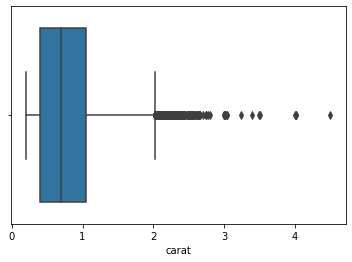

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


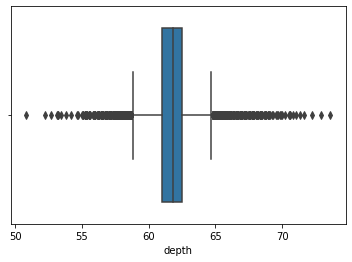

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


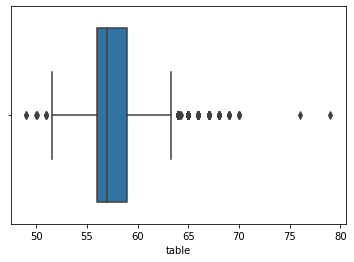

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


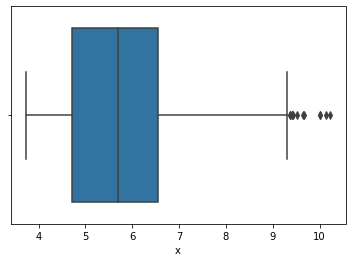

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


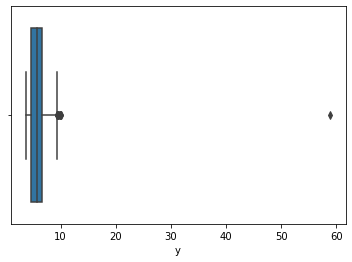

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


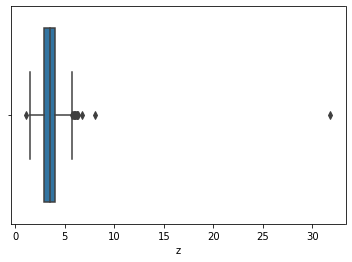

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


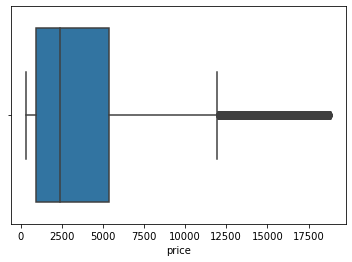

In [64]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

In [86]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [87]:
for column in df1[cols].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


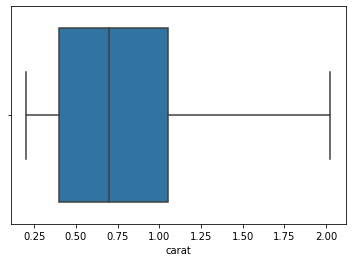

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


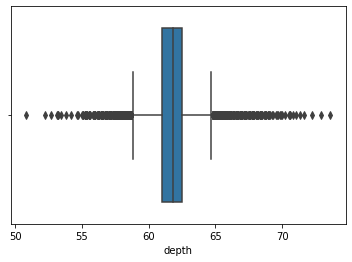

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


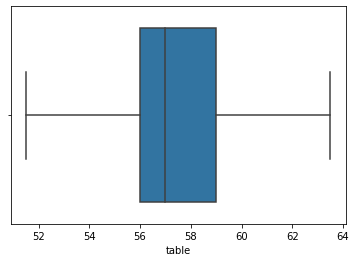

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


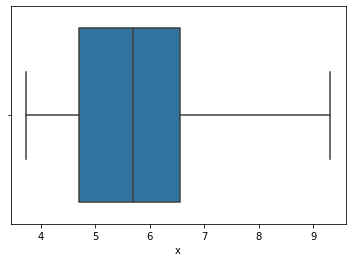

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


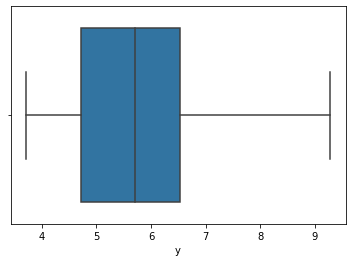

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


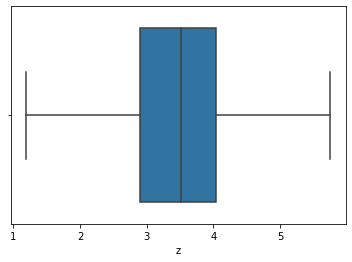

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


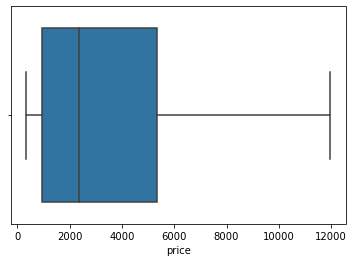

In [88]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

### EDA-Step 4 : Univariate Analysis.

### 1. CARAT VARIABLE:

Text(0.5, 1.0, 'carat Distribution')

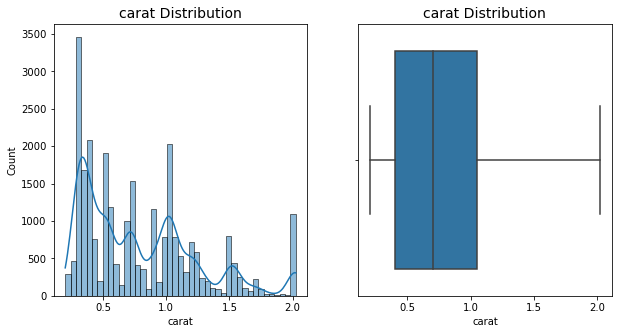

In [89]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.carat, kde=True, ax=axs[0])
fig1.set_title("carat Distribution",fontsize=14)
fig1=sns.boxplot(x='carat',data=df1, ax=axs[1])
fig1.set_title("carat Distribution",fontsize=14)

### 2. DEPTH VARIABLE:

Text(0.5, 1.0, 'depth Distribution')

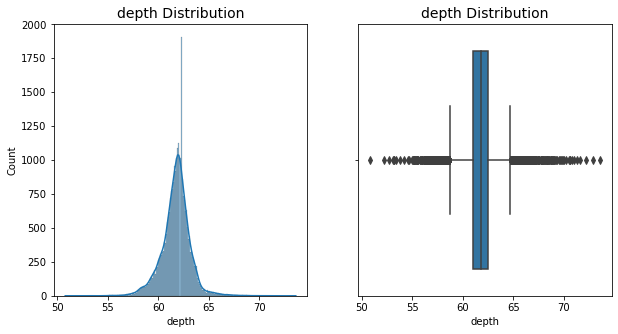

In [90]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.depth, kde=True, ax=axs[0])
fig1.set_title("depth Distribution",fontsize=14)
fig1=sns.boxplot(x='depth',data=df1, ax=axs[1])
fig1.set_title("depth Distribution",fontsize=14)

### 3. TABLE VARIABLE:

Text(0.5, 1.0, 'Table Distribution')

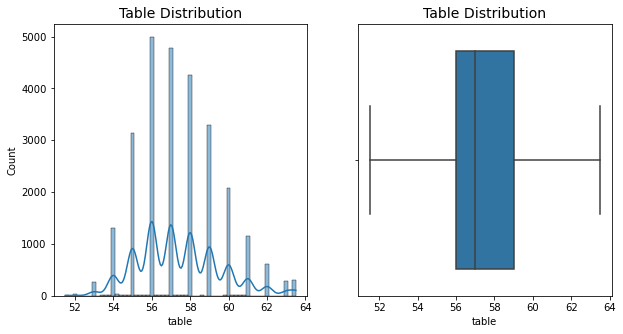

In [91]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.table, kde=True, ax=axs[0])
fig1.set_title("Table Distribution",fontsize=14)
fig1=sns.boxplot(x='table',data=df1, ax=axs[1])
fig1.set_title("Table Distribution",fontsize=14)

### 4. X VARIABLE:

Text(0.5, 1.0, 'X Distribution')

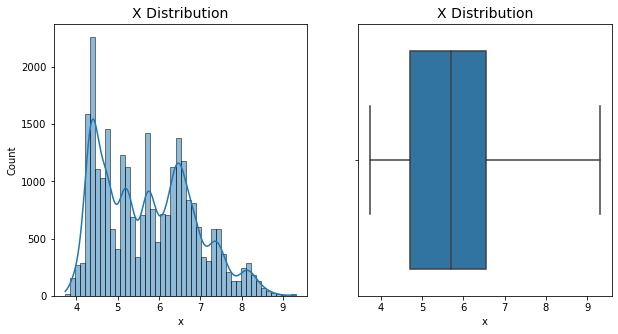

In [92]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.x, kde=True, ax=axs[0])
fig1.set_title("X Distribution",fontsize=14)
fig1=sns.boxplot(x='x',data=df1, ax=axs[1])
fig1.set_title("X Distribution",fontsize=14)

### 5. Y VARIABLE:

Text(0.5, 1.0, 'Y Distribution')

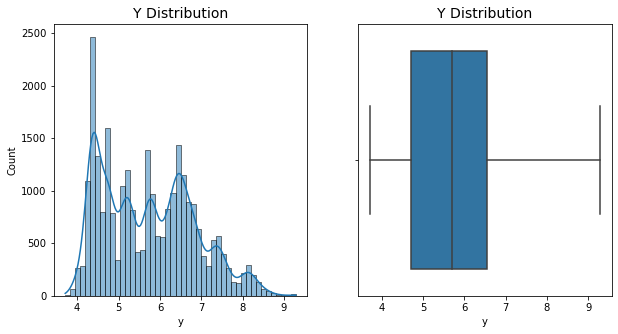

In [93]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.y, kde=True, ax=axs[0])
fig1.set_title("Y Distribution",fontsize=14)
fig1=sns.boxplot(x='y',data=df1, ax=axs[1])
fig1.set_title("Y Distribution",fontsize=14)

### 6. Z VARIABLE:

Text(0.5, 1.0, 'Z Distribution')

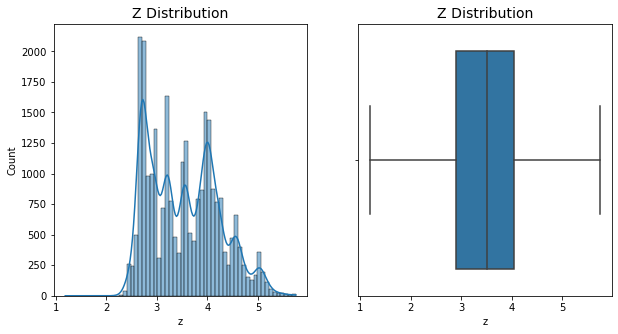

In [94]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.z, kde=True, ax=axs[0])
fig1.set_title("Z Distribution",fontsize=14)
fig1=sns.boxplot(x='z',data=df1, ax=axs[1])
fig1.set_title("Z Distribution",fontsize=14)

### 7. PRICE VARIABLE:

Text(0.5, 1.0, 'Price Distribution')

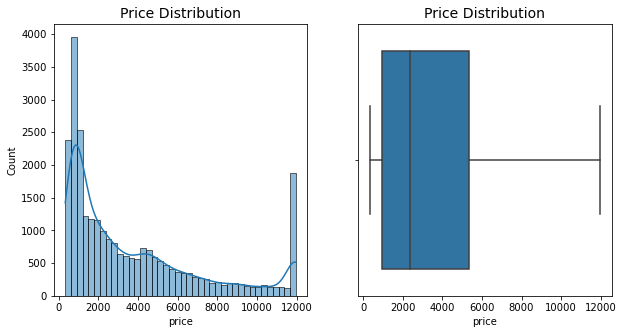

In [95]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df1.price, kde=True, ax=axs[0])
fig1.set_title("Price Distribution",fontsize=14)
fig1=sns.boxplot(x='price',data=df1, ax=axs[1])
fig1.set_title("Price Distribution",fontsize=14)

### Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.
The function should display the frequency of all the levels within the field and display a frequency plot

### Getting unique counts of Categorical Variables

In [96]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df1_cat[cat_column].value_counts())
    plt.figure()
    df1_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [97]:
df1_cat = df1.select_dtypes(include = ['object'])
lstcatcolumns = list(df1_cat.columns.values)
lstcatcolumns

['cut', 'color', 'clarity']

Details of cut
----------------------------------------------------------------
Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


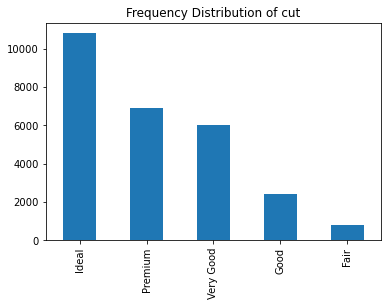

       
Details of color
----------------------------------------------------------------
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


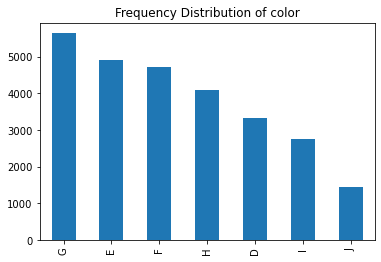

       
Details of clarity
----------------------------------------------------------------
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64


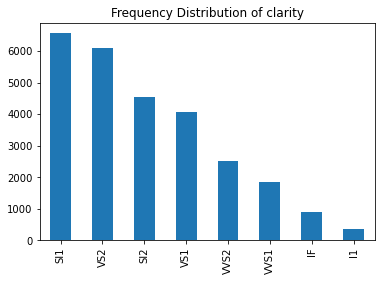

In [98]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Inference:
Looking at the above unique values for variable “Cut “ we see the ranking given for each 
unique value like “ Fair, Good, Ideal, Premium, Very Good “

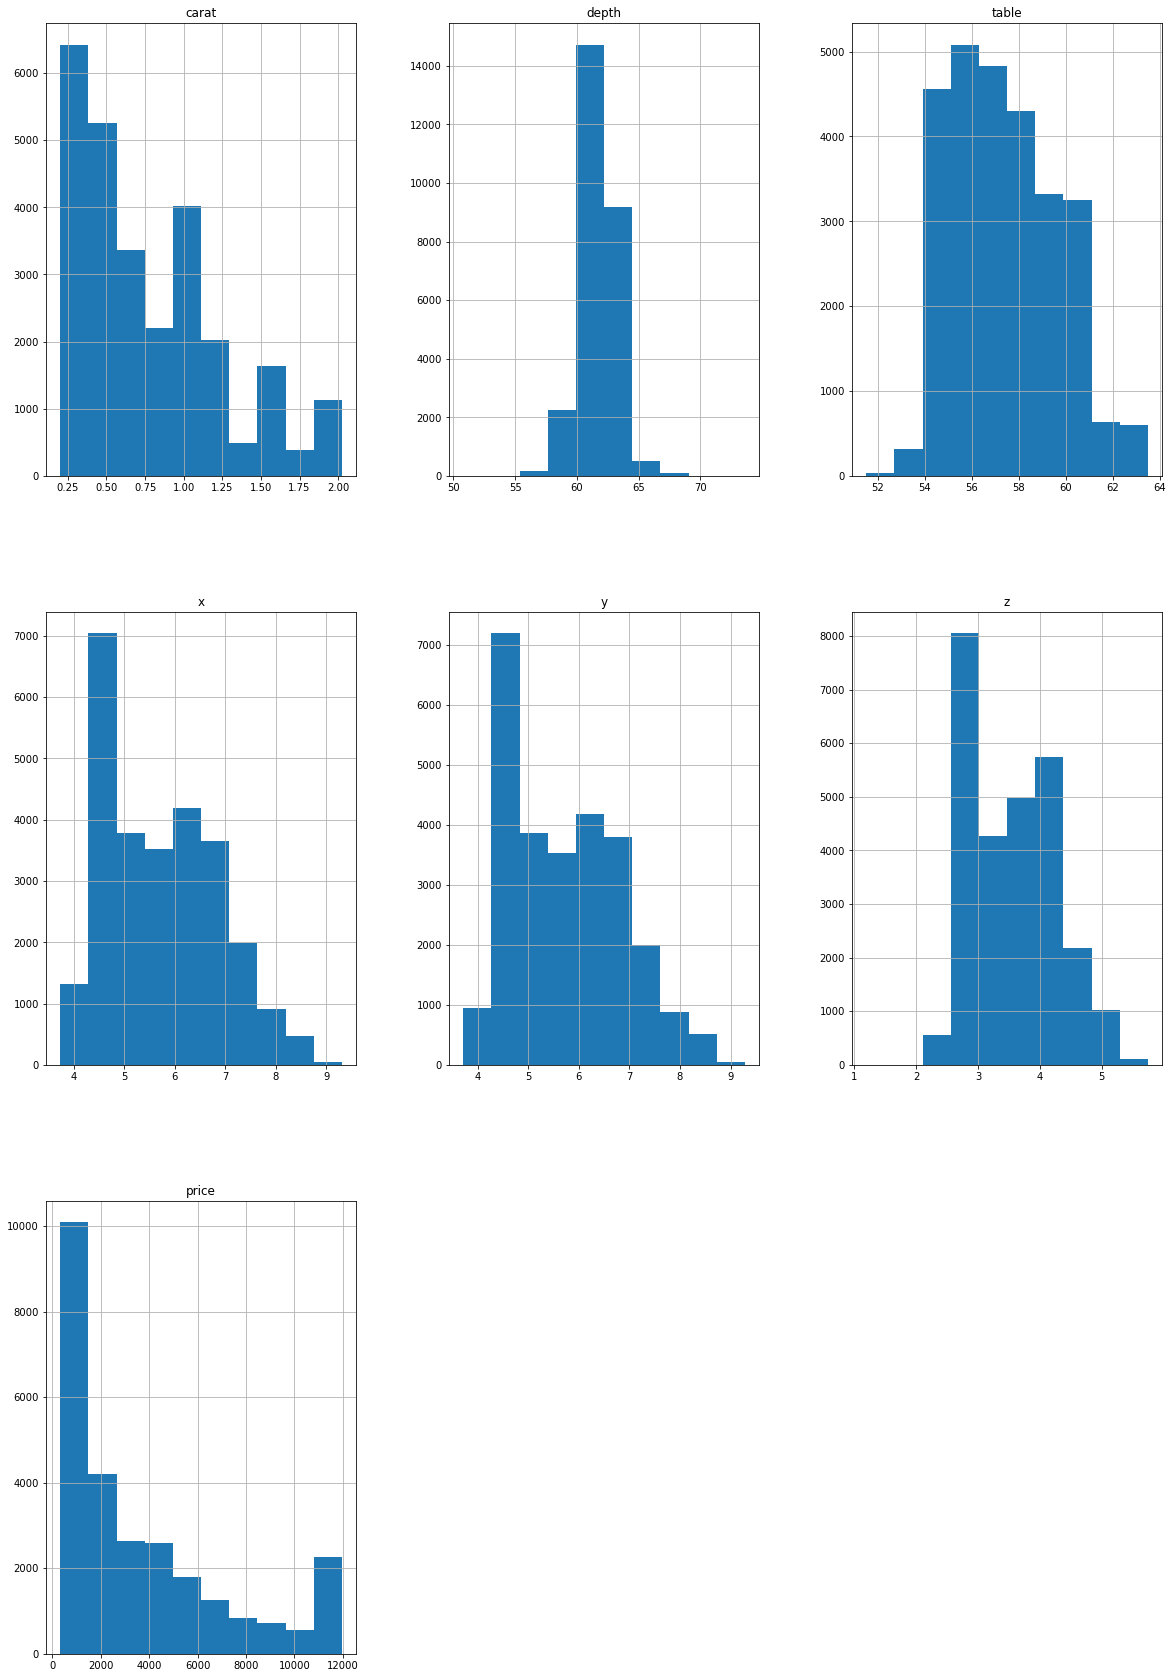

In [132]:
df1.hist(figsize=(20,30));

### SKEWNESS VALUE:

In [133]:
# Let's check the skewness values quantitativel y
df1.skew().sort_values(ascending=False)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_7696/3583810924.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew().sort_values(ascending=False)


price    1.157121
carat    0.917214
table    0.480476
x        0.397696
z        0.394819
y        0.394060
depth   -0.028403
dtype: float64

### Observations: 

- There is significant amount of outlier present in some variable.
- We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

### EDA-Step 5 : Bivariate Analysis:

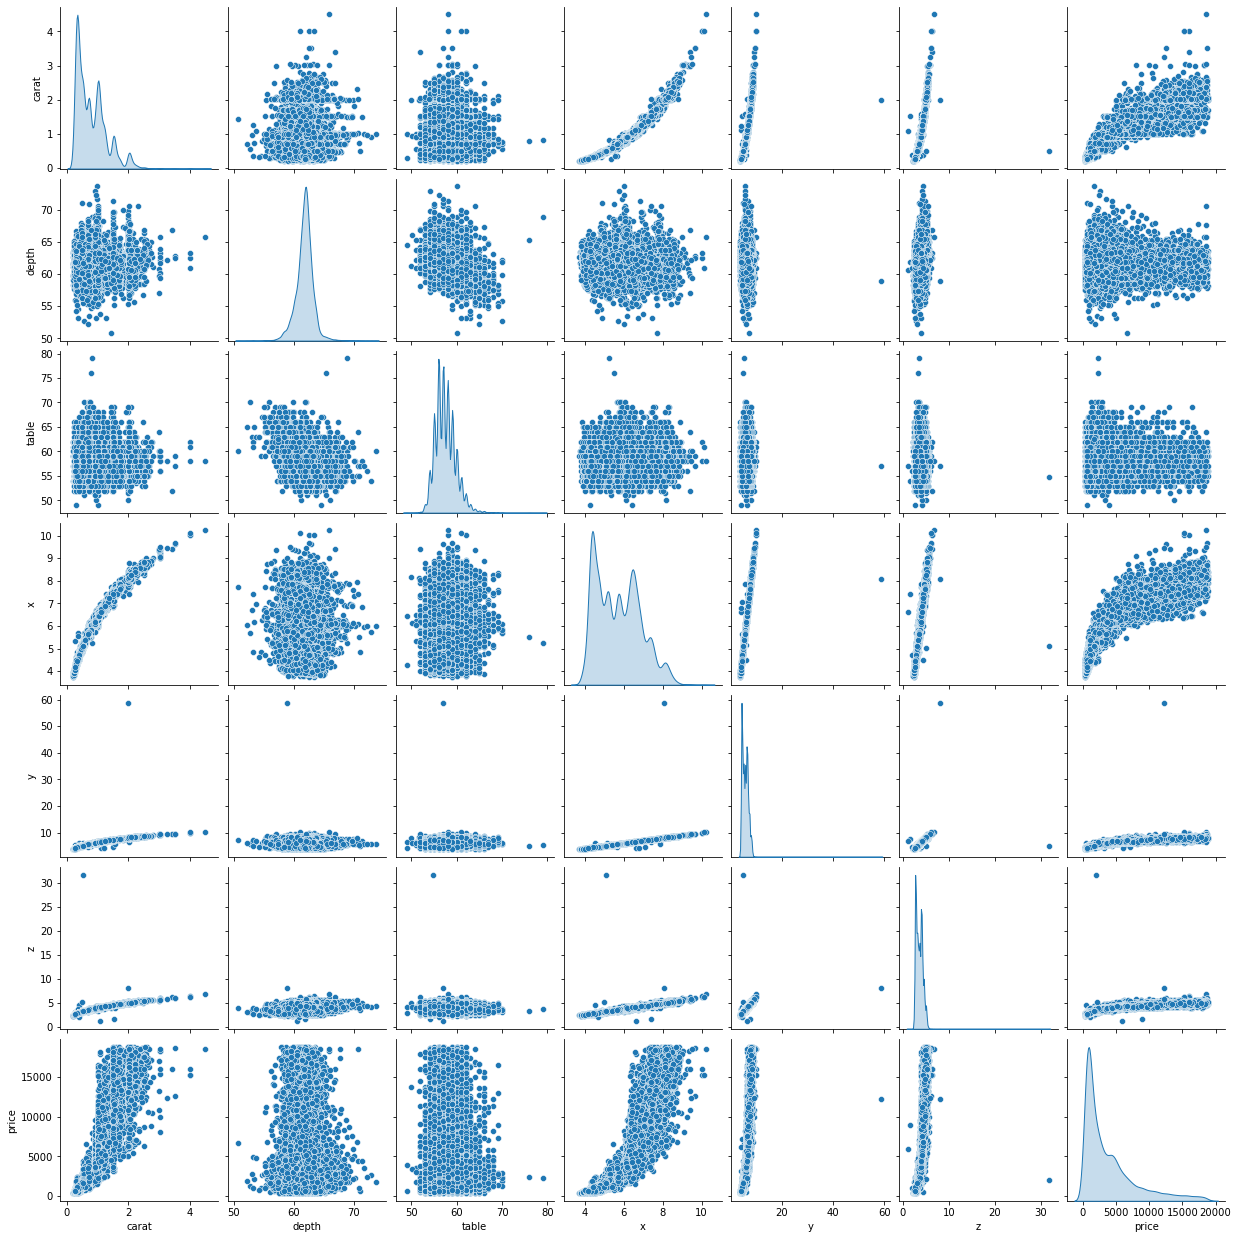

In [84]:
import seaborn as sns

df_attr = (df1[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Correlation between variables of the dataset

In [1]:
corr = df1.corr()
round(corr,3)

NameError: name 'df1' is not defined

### CORRELATION HEATMAP :

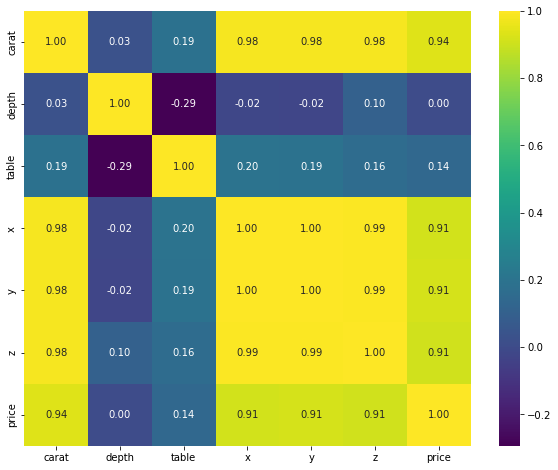

In [108]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

#### How each feature affects the price of diamonds.

In [109]:
correlations = df1.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth    0.000313
Name: price, dtype: float64

### Observations:

- We can identify that there is a strong correlation between independent variables –like Carat, x,y, and z. All these variables are strongly correlated with the target variable – price. 
- This indicates a strong case of our dataset struggling with multicollinearity.
- Depth does not show any strong relation with the price variable. For this case study, I would drop x,y, and z variables before creating the linear regression model. 
- Similarly, Depth does not seems to be influencing my variable price and hence, at some point, I will be dropping this variable from my model building process as well. 
- It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

### The inferences drawn from the above Exploratory Data analysis:

### Observations-1:

- 'Price' is the target variable while all others are the predictors.
- The data set contains 26967 row, 11 column. 
- In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.
- The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

### Observation-2: 

- On the given data set the the mean and median values does not have much difference. 
- We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries. 
- There are three object data type 'cut', 'color' and 'clarity'.

### Observation-3:

- We can observe there are 697 missing value in the depth column. There are some duplicate row present (33 duplicate rows out of 26958). which is nearly 0.12 % of the total data. So on this case we have dropped the duplicated row.

### Observation-4: :

- There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So we have treat the outliar. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

### Observation-5:

- It looks like most features do correlate with the price of Diamond. The notable exception is "depth" which has a negligble correlation (~1%). Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [110]:
# As we have checked there Are some missing values.
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [111]:
df1.median()

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_7696/2279417019.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

### Imputing missing values

In [112]:
#lets replace the missing values with median value. 
df1 = df1.fillna(df1.median())

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_7696/1179294249.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df1.fillna(df1.median())


### Checking for the values which are equal to zero

We have already check for 'Zero' value. and we can observe there are some amount of 'Zero' value present on the data set on variable 'x', 'y','z'.

This indicates that they are faulty values.

As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.

In [114]:
df1.shape # after removing 'zero value' from data set the data shape became as follows.

(26925, 10)

- There are missing values in the column “depth” – 697 cells or 2.6% of the total data 
set. 
- We can choose to impute these values using a mean or median. We checked for both the values and the result for both is almost similar. 
- For this case study, I have used median to impute the missing values. 

In [118]:
### checking for missing values after imputing the values 

df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

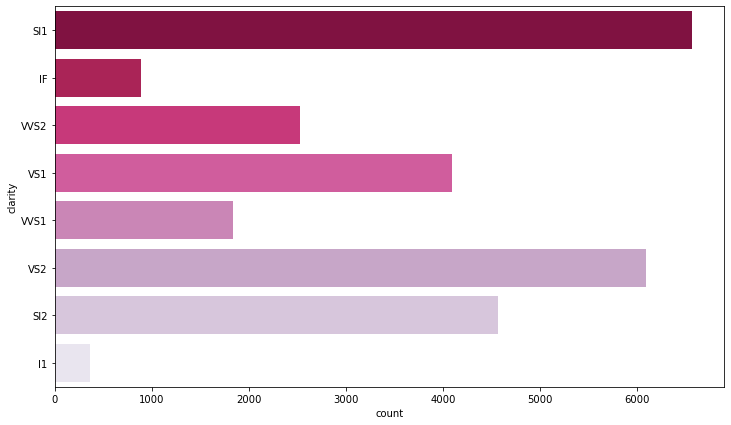

In [122]:
plt.figure(figsize=(12,7))
sns.countplot(y=(df1.clarity),palette='PuRd_r');

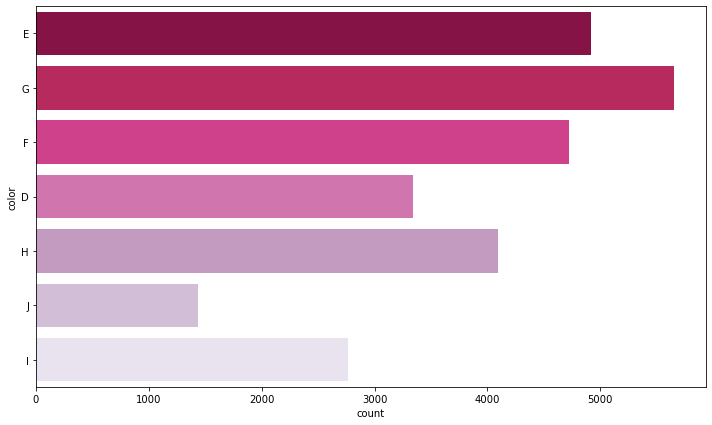

In [123]:
plt.figure(figsize=(12,7))
sns.countplot(y=(df1.color),palette='PuRd_r');

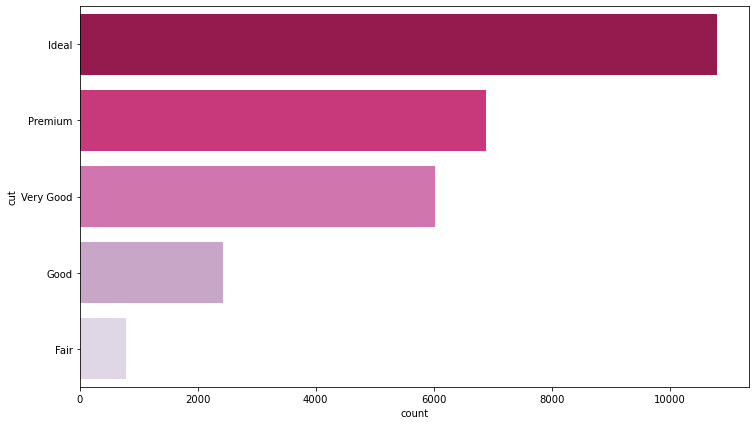

In [125]:
plt.figure(figsize=(12,7))
sns.countplot(y=(df1.cut),palette='PuRd_r');

### Price Distribution of Cut Variable

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


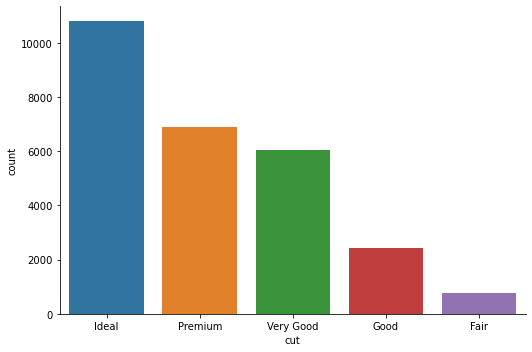

In [124]:
sns.catplot('cut', data=df1, kind='count',aspect=1.5)

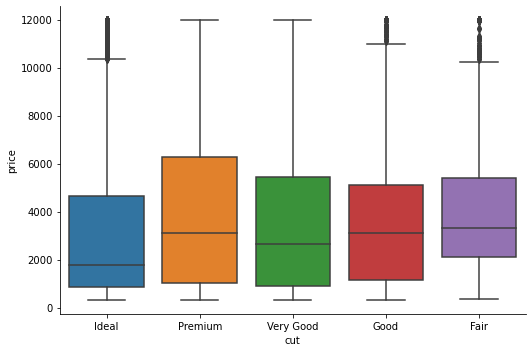

In [126]:
sns.catplot(x='cut', y='price', kind='box', data=df1, aspect=1.5)

### Observation on 'CUT':
    
- The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.
- For the cut variable we see the most sold is Ideal cut type gems and least sold is Fair cut gems
- All cut type gems have outliers expect Premium and Very Good with respect to price.
- Slightly less priced seems to be Ideal type and Premium cut type to be slightly more expensive.

### Price Distribution of Color Variable:

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


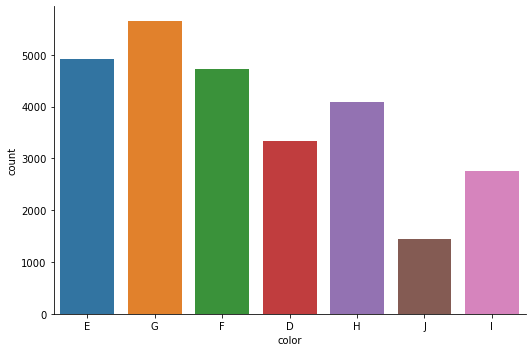

In [127]:
sns.catplot('color', kind='count', data=df1, aspect=1.5)

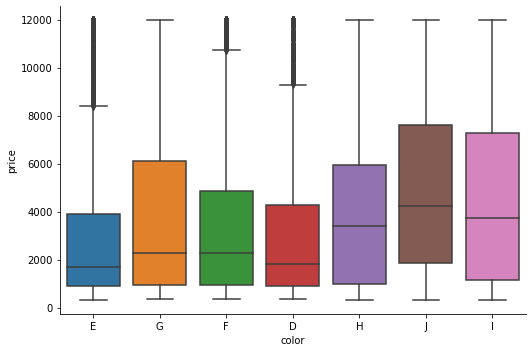

In [128]:
sns.catplot(x='color', y='price', data=df1, aspect =1.5, kind='box')

### Observations:

- For the color variable we see the most sold is G colored gems and least is J colored gems
- All color type gems have outliers with respect to price
- However, the least priced seems to be E type; J and I colored gems seems to be more expensive

### Price Distribution of Clarity Variable:

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


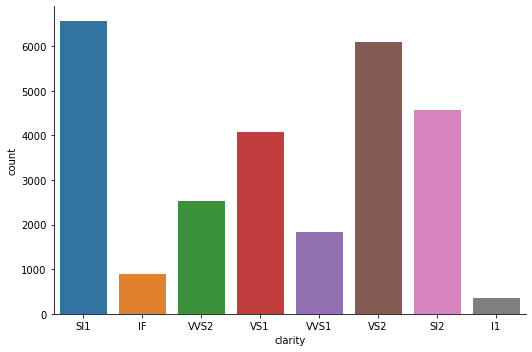

In [130]:
sns.catplot('clarity', kind='count', data=df1, aspect=1.5)

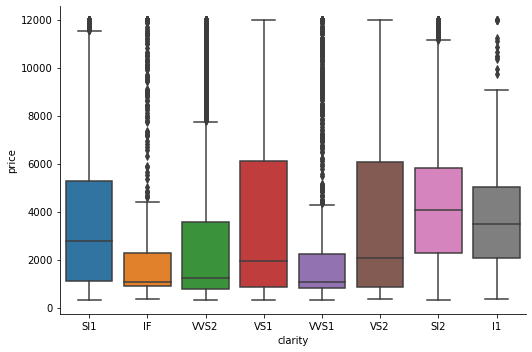

In [131]:
sns.catplot(x='clarity', y='price', data=df1, aspect =1.5, kind='box')

### Observations:

- The Diamonds clarity with VS1 & VS2 are the most Expensive.
- All clarity type gems except VS1 & VS2 have outliers with respect to price.
- Slightly less priced seems to be I1 type; VS2 and SI1 clarity stones seems to be more expensive.

In [120]:
df1.price.describe()

count    26925.000000
mean      3734.453965
std       3466.394724
min        326.000000
25%        945.000000
50%       2373.000000
75%       5353.000000
max      11965.000000
Name: price, dtype: float64

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Encode the data (having string values)

Geting unique counts of all Objects.

In [135]:
print('cut\n',df1.cut.value_counts())
print('\n')
print('color\n',df1.color.value_counts())
print('\n')
print('clarity\n',df1.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




### Converting objects to categorical codes.

In [136]:
df1['cut']=np.where(df1['cut'] =='Ideal', '4', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Premium', '3', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Very Good', '2', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Good', '1', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Fair', '0', df1['cut'])

In [137]:
df1['color']=np.where(df1['color'] =='D', '6', df1['color'])
df1['color']=np.where(df1['color'] =='E', '5', df1['color'])
df1['color']=np.where(df1['color'] =='F', '4',df1['color'])
df1['color']=np.where(df1['color'] =='G', '3', df1['color'])
df1['color']=np.where(df1['color'] =='H', '2', df1['color'])
df1['color']=np.where(df1['color'] =='I', '1', df1['color'])
df1['color']=np.where(df1['color'] =='J', '0', df1['color'])

In [138]:
df1['clarity']=np.where(df1['clarity'] =='IF', '7', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS1', '6', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS2', '5', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS1', '4', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS2', '3', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI1', '2', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI2', '1', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='I1', '0', df1['clarity'])

In [139]:
df1.dtypes # The'cut','color','clarity' column still showing as 'Object'.

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [140]:
# converting the'cut','color','clarity' column from object / string type to float.

df1['cut'] =df1['cut'].astype('float64')
df1['color'] = df1['color'].astype('float64')
df1['clarity'] =df1['clarity'].astype('float64')

In [141]:
df1.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [142]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


### Train-Test Split:

In [143]:
# Copy all the predictor variables into X dataframe
X = df1.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df1[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [144]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [145]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [146]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [147]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8901.94122507089
The coefficient for cut is 109.18812485149482
The coefficient for color is 272.92132964490276
The coefficient for clarity is 436.4411042154915
The coefficient for depth is 8.236971791614891
The coefficient for table is -17.34517038436938
The coefficient for x is -1417.9089304449492
The coefficient for y is 1464.8272701468106
The coefficient for z is -711.2250326814094


### Observation-1: 
Y=mx +c (m= m1,m2,m3...m9) here 9 diferent co-efficients will learn along with the intercept which is "c" from the model.

From the above coefficients for each of the independent attributes we can conclude

The one unit increase in carat increases price by 8901.941.

The one unit increase in cut increases price by 109.188.

The one unit increase in color increases price by 272.921.

The one unit increase in clarity increases price by 436.441.

The one unit increase in y increases price by 1464.827.

The one unit increase in depth increases price by 8.236.

But The one unit increase in table decreases price by -17.345,

The one unit increase in x decreases price by -1417.908,

The one unit increase in z decreases price by -711.225.

In [218]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3171.950447307667


### Observation-2: 

- The intercept (often labelled the constant) is the expected mean value of Y when all X=0. If X never equals 0, then the intercept has no intrinsic meaning.
- The intercept for our model is -3171.950447307667. In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless. We can do Z score or scaling the data and make it nearly zero.

In [148]:
# R square on training data
regression_model.score(X_train, y_train)

0.9311935886926559

In [149]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.931543712584074

### Observation:

- R-square is the percentage of the response variable variation that is explained by a linear model. Or
                R-square = Explained variation / Total variation
- R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean. 
- In this regression model we can see the R-square value on Training and Test data respectively 0.9311935886926559 and 0.931543712584074.

In [150]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.1312415459143

In [151]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.8447345328437

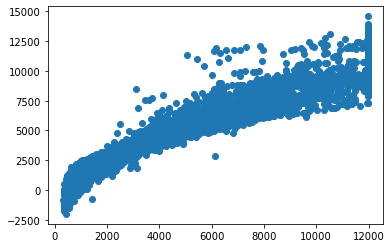

In [152]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

### Observation:

- we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

### Linear regression Performance Metrics:

intercept for the model: -3171.950447307667

R square on training data: 0.9311935886926559

R square on testing data: 0.931543712584074

RMSE on Training data: 907.1312415459143

RMSE on Testing data: 911.8447345328436

### As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

### Applying zscore statsmodels

In [153]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [154]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [155]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1837737061779434
The coefficient for cut is 0.035125000655297195
The coefficient for color is 0.13449269287641535
The coefficient for clarity is 0.20809779325621866
The coefficient for depth is 0.003326293718838773
The coefficient for table is -0.010815851633643403
The coefficient for x is -0.4596898424125279
The coefficient for y is 0.47166270917924047
The coefficient for z is -0.14249737973827098


In [156]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.879615251304733e-16


In [157]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9315051288558229

### Observation:

Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

### Check Multi-collinearity using VIF

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [160]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.96543302739589
cut ---> 10.388738909800345
color ---> 5.546407587131625
clarity ---> 5.455999699082339
depth ---> 1218.3824913329145
table ---> 878.3985698779234
x ---> 10744.05623520385
y ---> 9482.053091580401
z ---> 3697.5688286012546


We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

We are exploring the Linear Regression using statsmodels as we are interested in some more statistical metrics of the model.

### Linear Regression using statsmodels.

#### Concatenate X and y into a single dataframe

In [161]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [162]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -3171.950447
carat        8901.941225
cut           109.188125
color         272.921330
clarity       436.441104
depth           8.236972
table         -17.345170
x           -1417.908930
y            1464.827270
z            -711.225033
dtype: float64

In [163]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        12:36:21   Log-Likelihood:            -1.5510e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3171.9504    787.532     -4.028      0.0

### Observations:

- Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.

- Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'. Here all regression co-efficients are not '0'.

- For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [164]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [165]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [166]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

907.1312415459133

In [167]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

911.844734532842

In [168]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

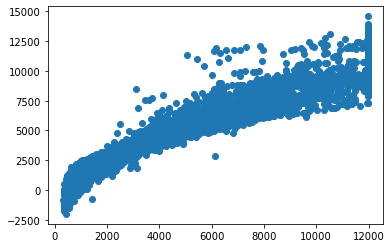

In [169]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [170]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91) * x + (1464.83) * y + (-711.23) * z + 

The final Linear Regression equation is:

price = b0 + b1 *carat[T.True] + b2 * cut + b3 * color + b4 * clarity+ b5 * depth + b6 * table + b7 * x + b8 * y + b9 *z True

price = (-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91)) * x + (1464.83) * y + (-711.23) * z _True


### Observation - 1: 

- When carat increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
- When cut increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
- When color increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
- When clarity increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
- When y increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.

As per model these five attributes that are most important attributes 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

There are also some negative co-efficient values, for instance, corresponding co-efficient (-1417.91) for 'x',(-711.23) for z and (-17.35) for table This implies, these are inversely proportional with diamond price.

### Observation - 2:
On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

Also we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

Finally we can conclude that best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

#### Inference:

we can see that the from the linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.

#### Linear regression Performance Metrics:

- intercept for the model: -3171.950447307667
- R square on training data: 0.9311935886926559
- R square on testing data: 0.931543712584074
- RMSE on Training data: 907.1312415459143
- RMSE on Testing data: 911.8447345328436

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

#### Impact of scaling:

Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

#### Multi collinearity:

We can observe there are very strong multi collinearity present in the data set.

#### From statsmodels:
we can see R-squared:0.931 and Adj. R-squared: 0.931 are same. The overall P value is less than alpha.

Finally we can conclude that Best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

- When 'carat' increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
- When 'cut' increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
- When 'color' increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
- When 'clarity' increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
- When 'y' increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.
- we can see the p value is showing 0.449 for depth variable, which is much greater than 0.05. That means this attribute is useless.
- There are also some negative co-efficient values, we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient -1417.9089. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.
- Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

### Recommendations:

- We can see that the from the linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.
- The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.
- To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.
- As we can see from the model Higher the width('y') of the stone is higher the price.So the stones having higher width('y') should consider in higher profitable stones.
- The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.
- The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones.
- There are also some negative co-efficient values, we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient -1417.9089. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.
- As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.So higher the Length('x') of the stone are lower is the profitability.
- Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why Stones with higher 'z' is also are lower in profitability.¶


### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [171]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

### Load the data:

In [172]:
df2 = pd.read_csv('Holiday_Package.csv')

### Checking the data:

In [10]:
df2.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [11]:
df2.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


### Performing EDA : 

### Checking the shape of the data :

In [173]:
### data dimensions
print("Number of rows: ",df2.shape[0], "\n""Number of columns: ",df2.shape[1])

Number of rows:  872 
Number of columns:  8


In [174]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [175]:
df2 = df2.dropna()
print(df2.shape)
print(list(df2.columns))

(872, 8)
['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children', 'no_older_children', 'foreign']


### Retreive the list of fields along with their data type:

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 61.3+ KB


In [177]:
# Dropping unwanted column
df2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [178]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


### Checking for duplicate values:

In [179]:
# Check for duplicates of data
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Checking the Summary Statistic

In [180]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking missing values 

In [181]:
### Checking for Missing Values

df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Observations:

- The data set contains 872 rows and 7 columns.
- In the given data set there are 5 Integer type features, 2 Object type features. Where 'Holliday_Package' is the target variable and all other are predector variable.
- We have dropped the first column ‘Unnamed: 0’ column as this is not important 
- There are No duplicate rows in the dataset.
- Salary ranges from 1322 to 236961. Average salary of employees is around 47729 with a standard deviation of 23418. Standard deviation indicates that the data is not normally distributed. 
- skewness of 0.71 indicates that the data is right skewed and there are few employees earning more than an average of 47729. - - 75% of the employees are earning below 53469 while 255 of the employees are earning 35324.
- Age of the employee ranges from 20 to 62. Median is around 39. 25% of the employees are below 32 and 25% of the employees are above 48. Standard deviation is around 10. Standard deviation indicates almost normal distribution.
- Years of formal education ranges from 1 to 21 years. 25% of the population has formal education for 8 years, while the median is around 9 years. 75% of the employees have formal education of 12 years. Standard deviation of the education isaround 3. This variable is also indicating skewness in the data.
- No null values.

In [182]:
df2.groupby('no_older_children').mean()

,Salary,age,educ,no_young_children
no_older_children,,,,
0,45520.888041,41.615776,9.544529,0.447837
1,46920.363636,39.161616,8.792929,0.343434
2,50788.350962,37.798077,9.461538,0.110577
3,50339.581818,38.800000,8.709091,0.090909
4,65118.714286,40.285714,10.285714,0.000000
5,59185.500000,43.500000,8.000000,0.000000
6,38605.000000,42.500000,8.500000,0.000000


In [183]:
df2.groupby('no_young_children').mean()

,Salary,age,educ,no_older_children
no_young_children,,,,
0,48210.348872,43.296241,9.144361,1.114286
1,45810.176871,29.265306,9.761905,0.707483
2,47275.854545,29.072727,9.890909,0.200000
3,45137.600000,29.600000,11.200000,0.200000


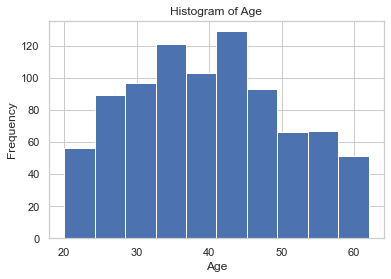

In [184]:
df2.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

#### OUTLIER'S CHECK:

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


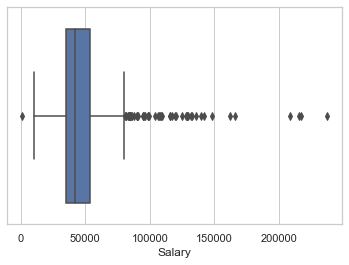

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


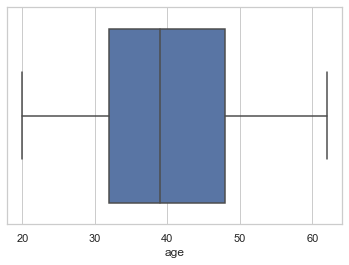

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


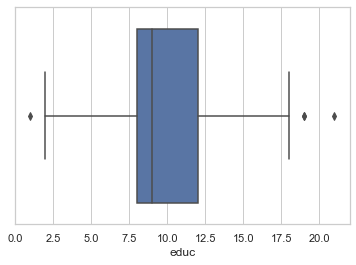

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


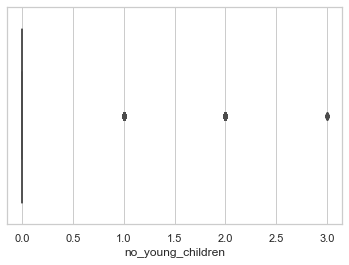

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


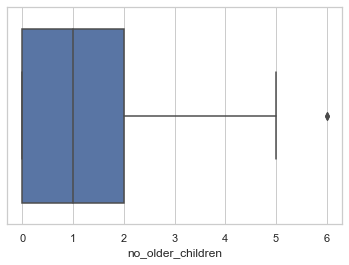

In [185]:
cols = ['Salary','age', 'educ', 'no_young_children', 'no_older_children']
for i in cols:
    sns.boxplot(df2[i],whis=1.5)
    plt.show();

<AxesSubplot:>

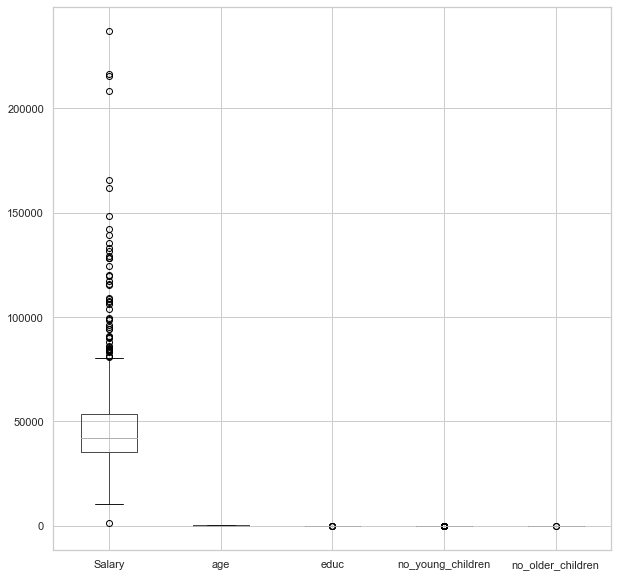

In [186]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df2.boxplot()

### Observations:

We can observe that there are significant outliers present in variable “ Salary”, however there are minimal outliers in other variables like ‘educ’, ‘no. of young children’ & ‘no. of older children’. There are no outliers in variable ‘age’. For Interpretation purpose we would need to study the variables such as no. of young children and no. of older children before outlier treatment. For this case study we will do outlier treatment for only salary & educ.

### UNIVARIATE ANALYSIS:

#### 1. SALARY VARIABLE:

Text(0.5, 1.0, 'Salary Distribution')

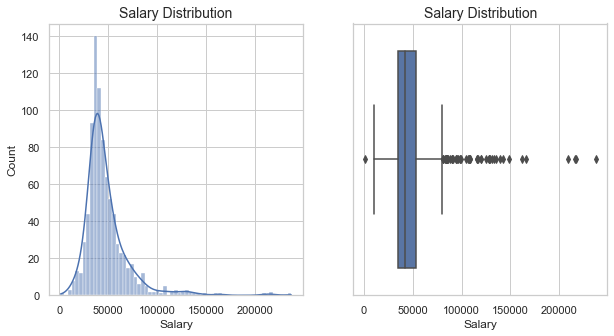

In [187]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df2.Salary, kde=True, ax=axs[0])
fig1.set_title("Salary Distribution",fontsize=14)
fig1=sns.boxplot(x='Salary',data=df2, ax=axs[1])
fig1.set_title("Salary Distribution",fontsize=14)

### Observations:

- For Univariate Analysis of Salary we are using histplot and boxplot to find information or patterns in the data.
- The Boxplot of Salary variable seems to have outliers. 
- The distribution of the data is right skewed

### 2. AGE VARIABLE:

Text(0.5, 1.0, 'Age Distribution')

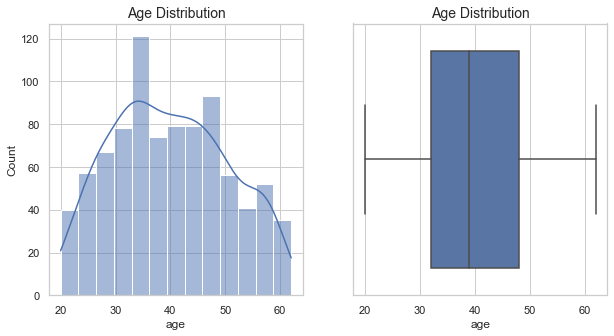

In [188]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df2.age, kde=True, ax=axs[0])
fig1.set_title("Age Distribution",fontsize=14)
fig1=sns.boxplot(x='age',data=df2, ax=axs[1])
fig1.set_title("Age Distribution",fontsize=14)

### Observations:

- The Boxplot of Age variable has no outliers.
- The distribution of the data is normally distributed and right skewed.
- Most of the employees are between the age limit 33 to 36 years.

### 3. EDUCATION VARIABLE:

Text(0.5, 1.0, 'Education Distribution')

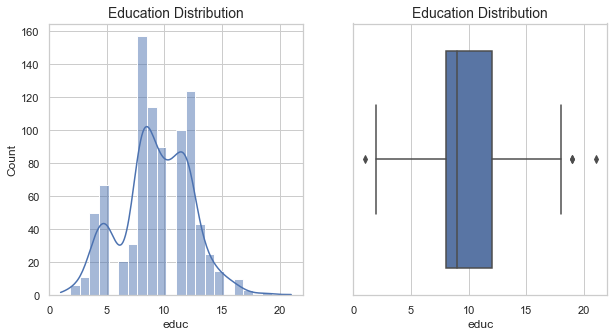

In [189]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df2.educ, kde=True, ax=axs[0])
fig1.set_title("Education Distribution",fontsize=14)
fig1=sns.boxplot(x='educ',data=df2, ax=axs[1])
fig1.set_title("Education Distribution",fontsize=14)

### Observations:

- The Boxplot of Education variable has few outliers.
- The distribution of the data is left skewed.

### 4. NUMBER OF YOUNG CHILDREN VARIABLE :

Text(0.5, 1.0, 'No_young_children Distribution')

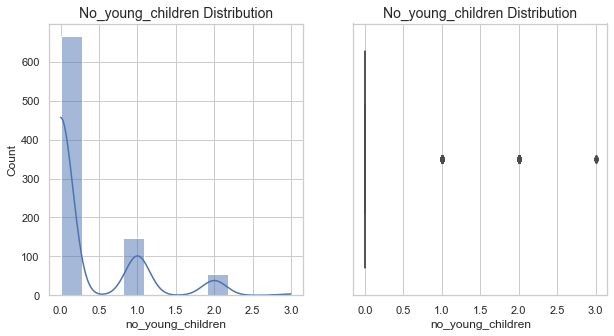

In [190]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df2.no_young_children, kde=True, ax=axs[0])
fig1.set_title("No_young_children Distribution",fontsize=14)
fig1=sns.boxplot(x='no_young_children',data=df2, ax=axs[1])
fig1.set_title("No_young_children Distribution",fontsize=14)

### Observations:

- The Boxplot of no_young_children variable has few outliers.
- The distribution of the data is right skewed.

### 5. NUMBER OF OLDER CHILDREN VARIABLE:

Text(0.5, 1.0, 'No_older_children Distribution')

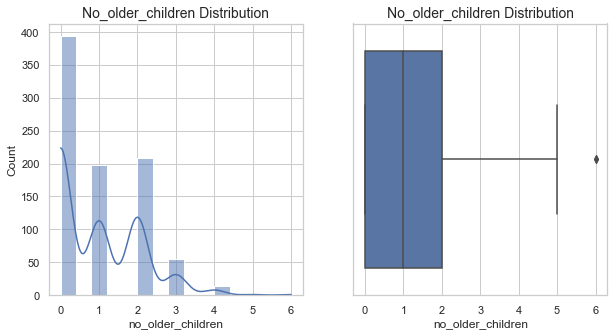

In [191]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df2.no_older_children, kde=True, ax=axs[0])
fig1.set_title("No_older_children Distribution",fontsize=14)
fig1=sns.boxplot(x='no_older_children',data=df2, ax=axs[1])
fig1.set_title("No_older_children Distribution",fontsize=14)

### Observations:

- The Boxplot of No_older_children variable has very few outliers.
- The distribution of the data is right skewed.

### Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.
The function should display the frequency of all the levels within the field and display a frequency plot

### Getting unique counts of Categorical Variables

In [192]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df2_cat[cat_column].value_counts())
    plt.figure()
    df2_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [193]:
df2_cat = df2.select_dtypes(include = ['object'])
lstcatcolumns = list(df2_cat.columns.values)
lstcatcolumns

['Holliday_Package', 'foreign']

Details of Holliday_Package
----------------------------------------------------------------
no     471
yes    401
Name: Holliday_Package, dtype: int64


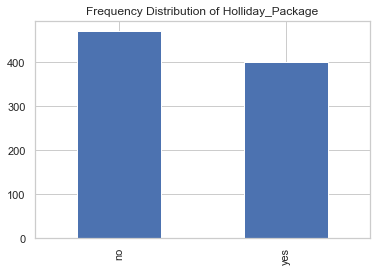

       
Details of foreign
----------------------------------------------------------------
no     656
yes    216
Name: foreign, dtype: int64


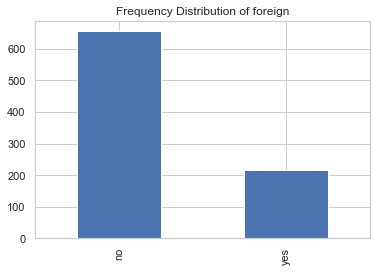

In [194]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [195]:
df2.groupby('Holliday_Package').mean()

,Salary,age,educ,no_young_children,no_older_children
Holliday_Package,,,,,
no,51739.443737,40.853503,9.594480,0.409766,0.902335
yes,43018.852868,38.900249,8.970075,0.197007,1.077307


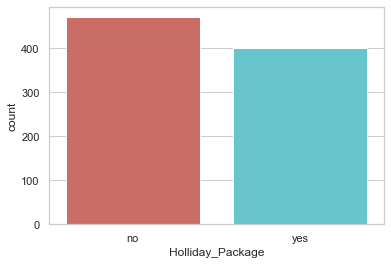

<Figure size 432x288 with 0 Axes>

In [197]:
sns.countplot(x='Holliday_Package',data=df2, palette='hls')
plt.show()
plt.savefig('count_plot')

In [198]:
df2.groupby('foreign').mean()

,Salary,age,educ,no_young_children,no_older_children
foreign,,,,,
no,50429.248476,40.603659,10.038110,0.282012,0.969512
yes,39528.939815,37.986111,7.087963,0.402778,1.023148


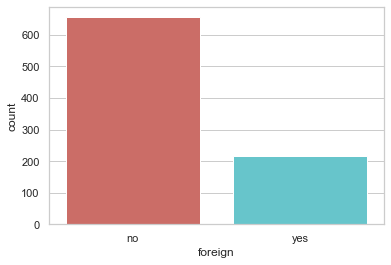

<Figure size 432x288 with 0 Axes>

In [39]:
sns.countplot(x='foreign',data=df2, palette='hls')
plt.show()
plt.savefig('count_plot')

#### Inference:

Foreign: The data is imbalanced with more skewed towards no and relatively a smaller shared for yes. 


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


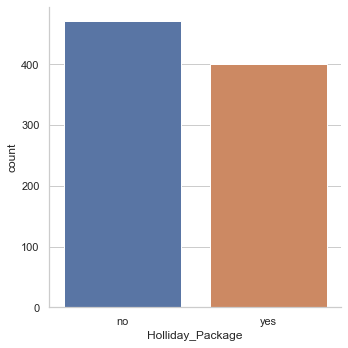

In [199]:
# EDA for categorical columns 'HOLLIDAY_PACKAGE'.
sns.catplot('Holliday_Package', data=df2, kind='count',aspect=1.0)

### Bi-Variate Analysis :

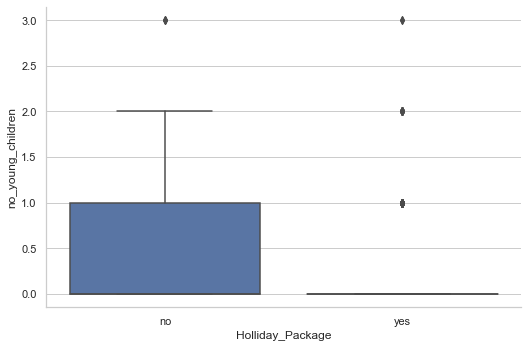

In [200]:
sns.catplot(x='Holliday_Package', y='no_young_children', kind='box', data=df2, aspect=1.5)

There is a significant difference in employees with younger children who are opting for holiday package and employees who are not opting for holiday packag

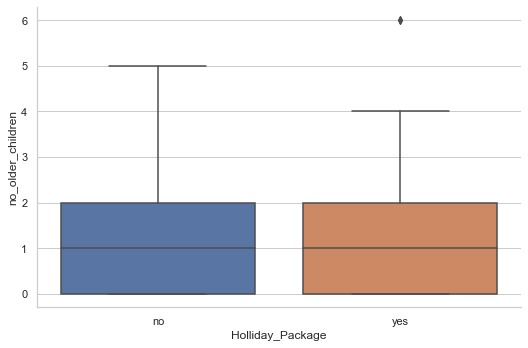

In [201]:
sns.catplot(x='Holliday_Package', y='no_older_children', kind='box', data=df2, aspect=1.5)

The distribution for opting or not opting for holiday packages looks same for employees with older children. At this point, this might not be a good predictor while creating our logistics model.

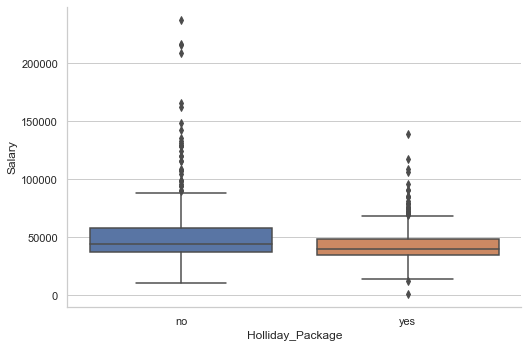

In [202]:
sns.catplot(x='Holliday_Package', y='Salary', kind='box', data=df2, aspect=1.5)

While performing the bivariate analysis we observe that Salary for employees opting for holiday package and for not opting for holiday package is similar in nature. However, the distribution is fairly spread out for people not opting for holiday packages.

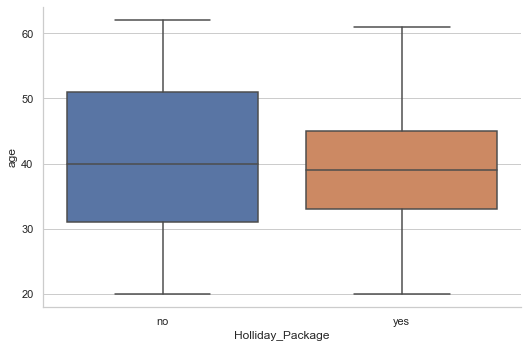

In [203]:
sns.catplot(x='Holliday_Package', y='age', kind='box', data=df2, aspect=1.5)

There are no outliers present in age variable.
The distribution of data for age variable with holiday package is also similar in nature.

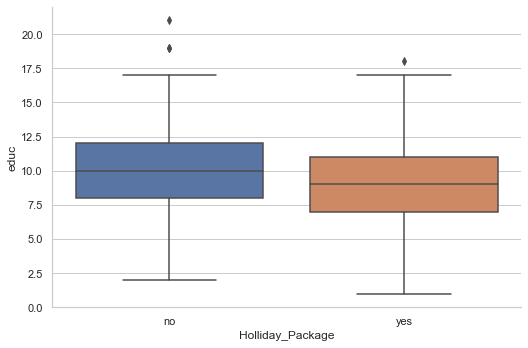

In [204]:
sns.catplot(x='Holliday_Package', y='educ', kind='box', data=df2, aspect=1.5)

This variable is also showing a similar pattern. This means education is likely not to be a variable for influencing holiday packages for employees.

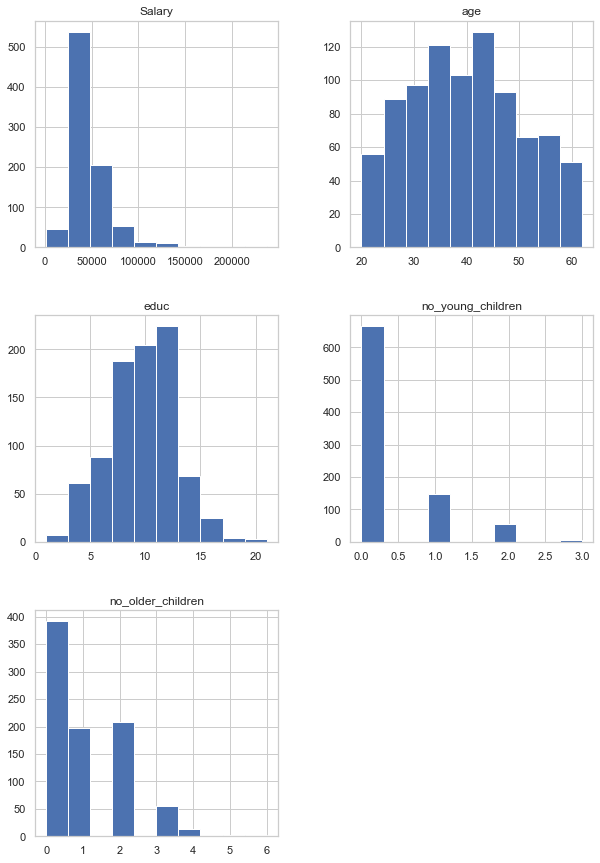

In [205]:
df2.hist(figsize=(10,15));

<AxesSubplot:xlabel='no_older_children'>

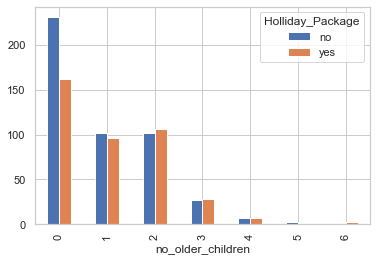

In [48]:
%matplotlib inline
pd.crosstab(df2.no_older_children,df2.Holliday_Package).plot(kind='bar')

Almost same distribution for both the scenarios when dealing with employees with older children.

<AxesSubplot:xlabel='no_young_children'>

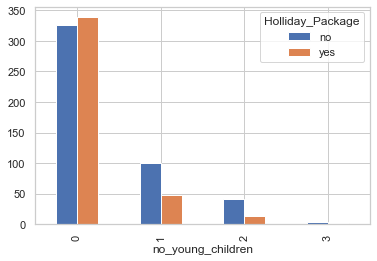

In [206]:
%matplotlib inline
pd.crosstab(df2.no_young_children,df2.Holliday_Package).plot(kind='bar')

We can clearly see that people with younger children are not opting for holiday packages

<AxesSubplot:xlabel='age'>

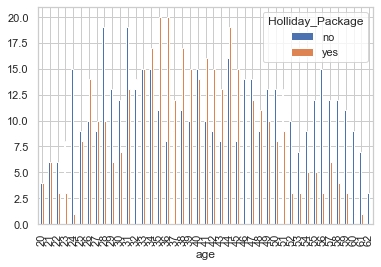

In [208]:
%matplotlib inline
pd.crosstab(df2.age,df2.Holliday_Package).plot(kind='bar')

We can clearly see that employees in middle range (34 to 45 years) are going for holiday package as compared to older and younger employees

<AxesSubplot:xlabel='educ'>

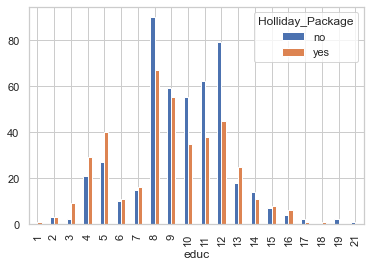

In [209]:
%matplotlib inline
pd.crosstab(df2.educ,df2.Holliday_Package).plot(kind='bar')

We observe that employees with less years of formal education(1 to 7 years) and higher education are not opting for the Holiday package as compared to employees with formal education of 8 year to 12 years.

<AxesSubplot:xlabel='no_young_children'>

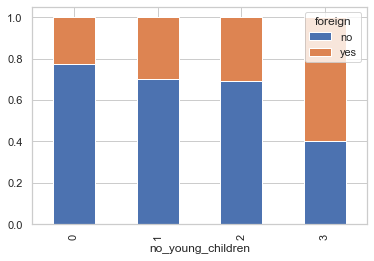

In [210]:
table=pd.crosstab(df2.no_young_children,df2.foreign)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='no_older_children'>

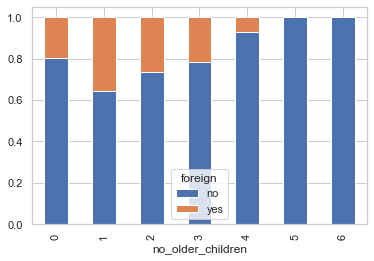

In [211]:
table=pd.crosstab(df2.no_older_children,df2.foreign)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

### MULTIVARIATE ANALYSIS:

Checking pairwise distribution of the continuous variables: [Salary, age,educ, no. of young 
children, 'no of older children]

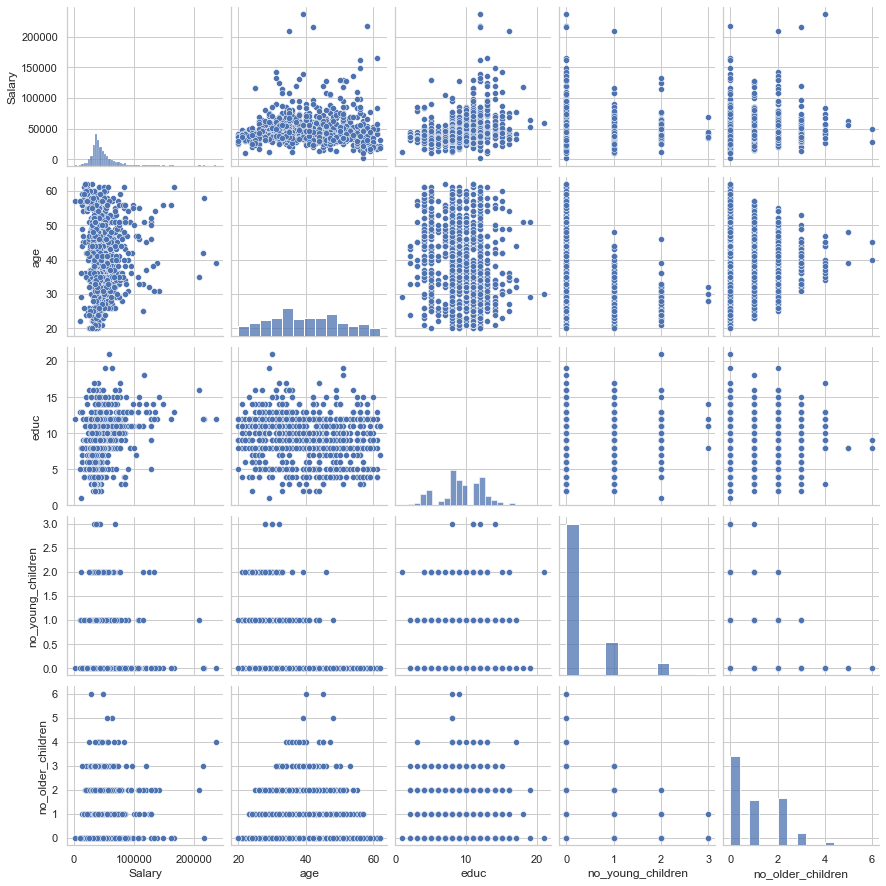

In [212]:
sns.pairplot(df2)

### SKEWNESS VALUE:

In [213]:
# Let's check the skewness values quantitatively
df2.skew().sort_values(ascending=False)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_7696/4083822795.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.skew().sort_values(ascending=False)


Salary               3.103216
no_young_children    1.946515
no_older_children    0.953951
age                  0.146412
educ                -0.045501
dtype: float64

### Correlation between variables of the dataset

We will see correlation between independent variables to see which factors might influence choice of holiday package.

In [214]:
corr = df2.corr()
round(corr,3)

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000,0.072,0.327,-0.030,0.114
age,0.072,1.000,-0.149,-0.519,-0.116
educ,0.327,-0.149,1.000,0.098,-0.036
no_young_children,-0.030,-0.519,0.098,1.000,-0.238
no_older_children,0.114,-0.116,-0.036,-0.238,1.000


### CORRELATION HEATMAP :

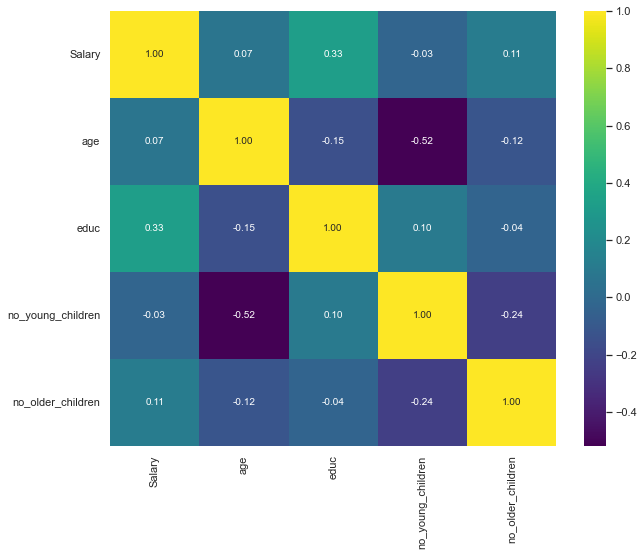

In [215]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

### Observations:

- We can relate there isn’t any strong correlation between any variables. 
- Salary and education display moderate correlation and no_older_children is somewhat correlated with salary variable. However, there are no strong correlation in the data set. 

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

While Linear Regression helps us predicting continuous target variable, Logistic Regression helps us for predicting a discrete a target variable. Logistic Regression is one of the “whitebox” algorithms which helps us in determining the probability values and the corresponding cut-offs. Logistic regression is used to solve such problem which gives us the corresponding 
probability outputs and then we can decide the appropriate cut-off points to get the target 
class outputs. 

Precisely Logistic Regression is defined as a statistical approach, for calculating the probability outputs for the target labels. In its basic form, it is used to classify binary data. 

Logistic regression is very much similar to linear regression where the explanatory 
variables(X) are combined with weights to predict a target variable of binary class(y).


#### In the given dataset, the target variable – Holliday Package and an independent variable –Foreign are object variables. Let us study them one at a time. 

#### Holliday_Package: The distribution seems to be fine, with 54% for no and 46% for yes.

In [217]:
# Converting Categorical to Numerical Variable
for feature in df2.columns: 
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes 

In [218]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 74.9 KB


### Train Test Split

Split X and Y into training and test set in 70:30 ratio. This implies 70% of the total data will be used for training purposes and remaining 30% will be used for test purposes 

### Logistic Regression Model

In [220]:
# Train-Test Split
# Copy all the predictor variables into X dataframe
X = df2.drop(['Holliday_Package'],axis=1)

# Copy target into the y dataframe. 
Y = df2.Holliday_Package

In [221]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1,stratify=df2['Holliday_Package'])

### Data split for the target variable – Holliday_Package in training and test sets

In [222]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [223]:
Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

Checking the data split for the dependent variable – Y in both train and test data. The percentage split between no and yes seems to be almost same at 54% and 46%, respectively for both train and test data sets.
The data proportion seems to be reasonable and we can continue with our model building as next steps.

As next steps, we will initiate the LogisticRegression function and will then fit the Logistic Regression model. There after we will predict on the training and test data set.

In [224]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [225]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [226]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


### Model Evaluation

In [228]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.6672131147540984

### AUC and ROC for the training data

AUC: 0.735


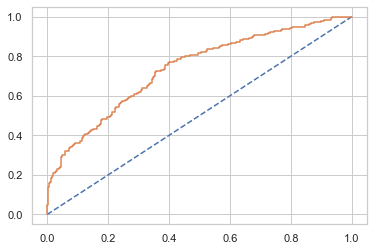

In [229]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [230]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.6526717557251909

### AUC and ROC for the test data

AUC: 0.735


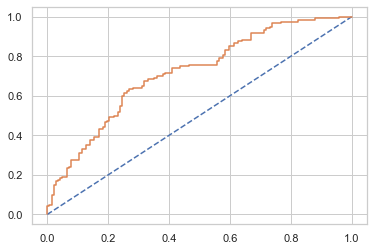

In [231]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [232]:
confusion_matrix(Y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

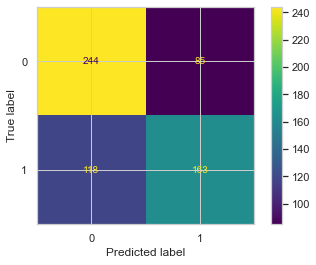

In [233]:
plot_confusion_matrix(model,X_train,Y_train);

In [234]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Confusion Matrix for test data

In [235]:
confusion_matrix(Y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

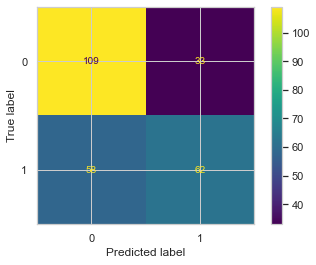

In [236]:
plot_confusion_matrix(model,X_test,Y_test);

In [237]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



### Model Accuracy scores:

### Training data:
model.score(X_train, y_train) at 66.7%

### Test data:
model.score(X_test, y_test) at 65.2%

The accuracy scores aren’t too different and can be considered as right fit models avoiding the scenarios of underfit and overfit models.

We can apply for GridSearchCV here to finetune the model further to see whether it helps to improve the results. GridSearchCV is a iterative method of obtaining the best model based on a scoring metric with provided parameters.

### Applying GridSearchCV for Logistic Regression

In [238]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [239]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [240]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [242]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [243]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [83]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [244]:
best_model = grid_search.best_estimator_

In [246]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [247]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.534650,0.465350
1,0.556290,0.443710
2,0.539223,0.460777
3,0.549676,0.450324
4,0.572353,0.427647


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


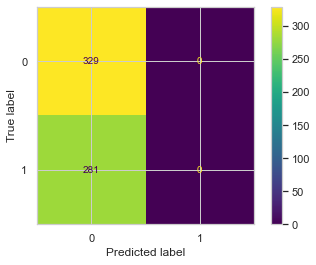

In [248]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,Y_train)
print(classification_report(Y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


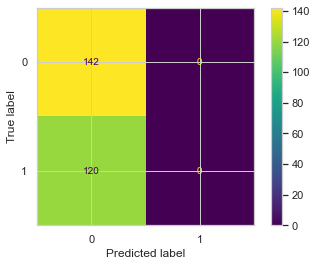

In [249]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,Y_test)
print(classification_report(Y_test, ytest_predict),'\n');

#### Post running the GridSeachCV, we can check on the accuracy scores again to identify if the model performance has improved or not.

#### The accuracy scores for:

Train data is at 54% Test data is at 54%

There is a reduction in accuracy score for the both train and test data.

Post creating this model, we will then move on to creating the Linear Discriminant Analysis (LDA).

LDA takes the help of prior probabilities to predict the corresponding target probabilities. Prior probabilities is the probability of y (say equal to 1) without taking into account any other data or variables. The corresponding updated probabilities when the covariates (Xs) are available is called the posterior probabilities. We want to find P(Y=1|X). Thus, a 
Linear Discriminant Analysis (LDA) discriminates between the two classes by looking at the features (Xs)

### LDA Model

In [250]:
# Train-Test Split
# Copy all the predictor variables into X dataframe
X = df2.drop(['Holliday_Package'],axis=1)

# Copy target into the y dataframe. 
Y = df2.Holliday_Package

In [251]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=1, stratify = Y)

In [252]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [253]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train , Y_train)

### Prediction

In [254]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

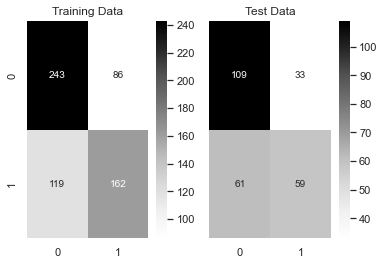

In [255]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [100]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



### Probability prediction for the training and test data

In [257]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [258]:
pred_prob_train[:,1]

array([0.7381512 , 0.28961707, 0.38234291, 0.76483486, 0.46682945,
       0.44346246, 0.37680169, 0.30948321, 0.61081614, 0.64208316,
       0.25213217, 0.26469615, 0.39923017, 0.04631524, 0.23022974,
       0.36249565, 0.53701148, 0.33367574, 0.63047975, 0.62551868,
       0.62038047, 0.26045898, 0.8778445 , 0.33010529, 0.09907975,
       0.83197262, 0.20726445, 0.7448485 , 0.52475576, 0.18602064,
       0.34007289, 0.32707499, 0.37873484, 0.42874061, 0.31084381,
       0.28746402, 0.11553843, 0.53094637, 0.47040748, 0.22122639,
       0.26026817, 0.80975365, 0.51459465, 0.74029285, 0.79737631,
       0.40099878, 0.298335  , 0.93065406, 0.44451279, 0.70660174,
       0.75490574, 0.46875931, 0.77220783, 0.37565531, 0.22661608,
       0.74188557, 0.26237721, 0.5247693 , 0.6721239 , 0.34088095,
       0.62335813, 0.57741879, 0.54295979, 0.45085985, 0.56389786,
       0.5965561 , 0.12149134, 0.57410954, 0.3890238 , 0.26157228,
       0.35655665, 0.7429183 , 0.76617151, 0.22742495, 0.42898

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


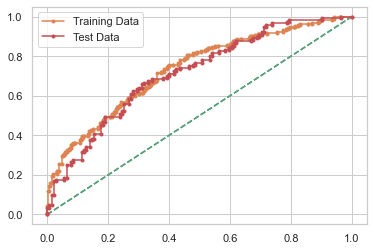

In [259]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### changing the cut-off values for maximum accuracy

In [260]:
X_train.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
821,38974,47,12,0,2,1
805,40270,33,8,2,0,1
322,32573,30,11,1,0,0
701,43839,43,11,0,1,1
773,33060,40,5,1,1,1


In [261]:
Y_train

821    0
805    0
322    0
701    1
773    1
      ..
594    0
297    1
76     0
831    1
187    0
Name: Holliday_Package, Length: 610, dtype: int8

0.1 

Accuracy Score 0.482
Recall Score 0.9964
F1 Score 0.6393 

Confusion Matrix


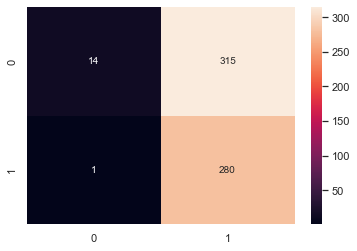

0.2 

Accuracy Score 0.5213
Recall Score 0.9644
F1 Score 0.6499 

Confusion Matrix


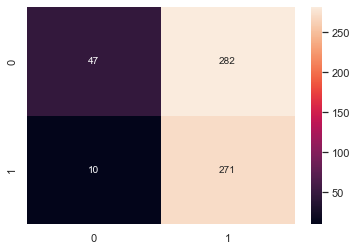

0.3 

Accuracy Score 0.5934
Recall Score 0.8932
F1 Score 0.6693 

Confusion Matrix


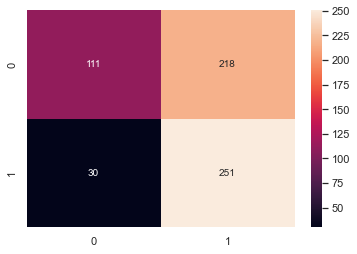

0.4 

Accuracy Score 0.6656
Recall Score 0.758
F1 Score 0.6762 

Confusion Matrix


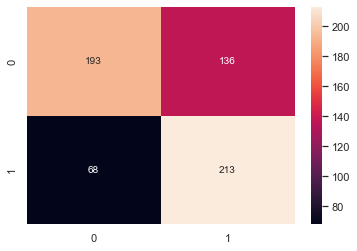

0.5 

Accuracy Score 0.6639
Recall Score 0.5765
F1 Score 0.6125 

Confusion Matrix


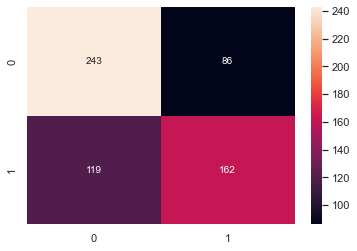

0.6 

Accuracy Score 0.659
Recall Score 0.4235
F1 Score 0.5336 

Confusion Matrix


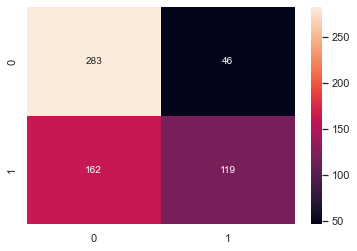

0.7 

Accuracy Score 0.6492
Recall Score 0.2989
F1 Score 0.4398 

Confusion Matrix


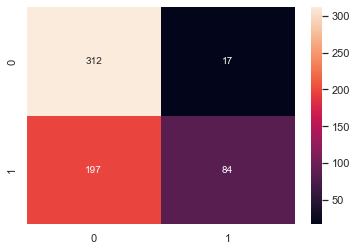

0.8 

Accuracy Score 0.5885
Recall Score 0.1103
F1 Score 0.1981 

Confusion Matrix


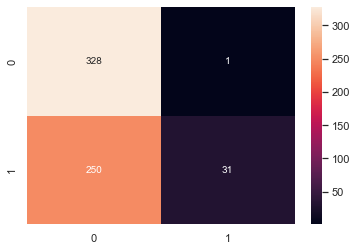

0.9 

Accuracy Score 0.5426
Recall Score 0.0071
F1 Score 0.0141 

Confusion Matrix


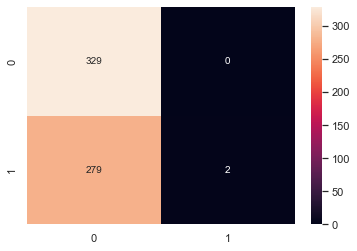

In [262]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)): # defining a loop for the length of the train data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [271]:
#Predicting the classes on the test data

data_pred_custom_cutoff = []
for i in range(0,len(Y_test)):
    if np.array(pred_prob_test[:,1])[i] > 0.4:  # Selected 0.4 bcoz f1-score is highest at 0.4 cut-off
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

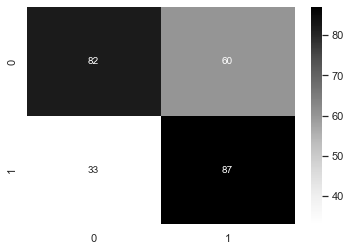

In [272]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [273]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



### LDA Model

In [270]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.612003
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 May 2022   Pseudo R-squ.:                  0.1129
Time:                        12:43:49   Log-Likelihood:                -533.67
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.337e-27
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Salary            -1.584e-05   4.07e-06     -3.896      0.000   -2.38e-05   -7.87e-06
age     

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

Confusion matrix cells has the terms: 
True Positive(TP)- The values which are predicted as True and are actually True. 
True Negative(TN)- The values which are predicted as False and are actually False. 
False Positive(FP)- The values which are predicted as True but are actually False. 
False Negative(FN)- The values which are predicted as False but are actually True.

### ROC Curve: 
Receiver Operating Characteristic(ROC) measures the performance of models by evaluating the trade-offs between sensitivity (true positive rate) and false (1-
specificity) or false positive rate. 

### AUC Curve:
The area under curve (AUC) is another measure for classification models is based on ROC. It is the measure of accuracy judged by the area under the curve for ROC

In [109]:
# Train-Test Split
# Copy all the predictor variables into X dataframe
X = df2.drop(['Holliday_Package'],axis=1)

# Copy target into the y dataframe. 
y = df2.Holliday_Package

In [110]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [111]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.9s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg', verbose=True)

In [114]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [115]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.753599,0.246401
1,0.287308,0.712692
2,0.888743,0.111257
3,0.974783,0.025217
4,0.499096,0.500904


In [118]:
# Accuracy - Train Data
model.score(X_train, y_train)

0.680327868852459

AUC: 0.743


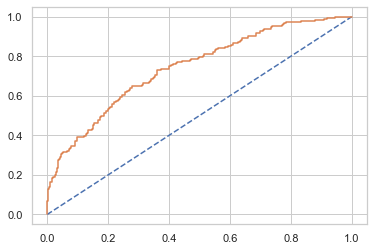

In [119]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [120]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6450381679389313

AUC: 0.743


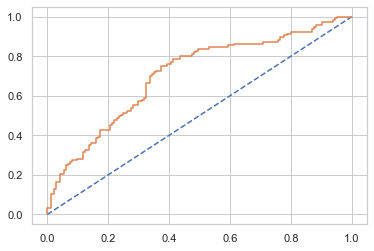

In [121]:
# Test model roc auc score
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [192]:
# Confusion matrix on train data
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [121, 163]], dtype=int64)

The result is being telling us that there are 252+163 correct predictions and 121+74 wrong predictions

In [193]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [194]:
# Confusion Matrix for Test Data
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[102,  43],
       [ 50,  67]], dtype=int64)

The result is being telling us that we have 102+67 correct predictions and 50+43 incorrect predictions

In [124]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.6450381679389313

In [126]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [127]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.612003
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.1129
Time:                        21:05:49   Log-Likelihood:                -533.67
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.337e-27
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Salary            -1.584e-05   4.07e-06     -3.896      0.000   -2.38e-05   -7.87e-06
age     

In [139]:
# Linear Discriminate Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis()

In [140]:
# Predicting Train Data
# Predict it
# Predict it
pred_class = model1.predict(X_train)

In [141]:
print(classification_report(y_train, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [142]:
# Confusion matrix on train data
#generate Confusion Matrix

confusion_matrix(y_train, pred_class)

array([[252,  74],
       [126, 158]], dtype=int64)

In [143]:
#Predicting Test data
model2=clf.fit(X_test,y_test)
model2

LinearDiscriminantAnalysis()

In [144]:
pred_class2 = model2.predict(X_test)

In [145]:
print(classification_report(y_test, pred_class2))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       145
           1       0.67      0.55      0.60       117

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.67       262



In [146]:
# Confusion matrix on test data
confusion_matrix(y_test, pred_class2)

array([[114,  31],
       [ 53,  64]], dtype=int64)

### Observations:

While looking the metrices for both training and the test data, it seems the accuracy scores are same on both models at 66%. Our model is close enough to be treated as a right fit model. The current model is not struggling with being a over fit model or an under fit model. 

The AUC scores for both the training and test data is also same at 74.3%. 

The model performance is good on F1 score as well with training data performing better at 62% while the test data gave a F1 score of 57%. 

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

- Here Salary and education seems to be important parameters which is an important predictor. 
- While performing the bivariate analysis we observe that Salary for employees opting for holiday package and for not opting for holiday package is similar in nature. However, the distribution is fairly spread out for people not opting for holiday packages.
- The distribution of data for age variable with holiday package is also similar in nature. The range of age for people not opting for holliday package is more spread out when compared with people opting for yes.
- We can observe that employees in middle range (34 to 45 years) are going for holiday package as compared to older and younger employees
- There is a significant difference in employees with younger children who are opting for holiday package and employees who are not opting for holiday package.
- Employees with older children has almost similar distribution for opting and not opting for holiday packages across the number of children levels and hence it is not an important predictor for this model.

###  Interpretations:

1) There is no effect of salary, age, and education on the prediction for Holliday_packages. These variables don’t seem to impact the decision to opt for holiday packages as we couldn’t establish a strong relation of these variables with the target variable
2) Foreign has emerged as a strong predictor with a positive coefficient value. The likelihood of a foreigner opting for a holiday package is high.
3) no_young_children variable is negating the probability for opting for holiday packages, especially for couple with number of young children at 2. 

### Recommendation: 

1) The company should really focus on foreigners to drive the sales of their holiday packages as that’s where the majority of conversions are going to come in. 
2) The company can try to direct their marketing efforts or offers toward foreigners for a better conversion opting for holiday packages 
3) The company should also stay away from targeting parents with younger children.The chances of selling to parents with 2 younger children is probably the lowest. This gives the fact that parents try and avoid visiting with younger children.
4) If the firm wants to target parents with older children, that still might end up giving favorable return for their marketing efforts then spent on couples with younger children.
